In [1]:
import math

In [2]:
math.tanh(-2.2)

-0.9757431300314515

In [3]:
math.tanh(0.1)

0.09966799462495582

In [4]:
math.tanh(2.5)

0.9866142981514303

In [5]:
math.tanh(999)

1.0

In [6]:
import numpy as np
import torch
import torch.optim as optim

In [7]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # <1>
t_u = torch.tensor(t_u).unsqueeze(1) # <1>

t_u.shape

torch.Size([11, 1])

In [8]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([ 9,  8,  0,  6,  3,  1,  2,  7, 10]), tensor([4, 5]))

In [9]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [10]:
import torch.nn as nn

linear_model = nn.Linear(1,1) #input, output, bias flag
linear_model(t_un_val)

tensor([[4.4157],
        [3.8599]], grad_fn=<AddmmBackward>)

In [11]:
linear_model.weight

Parameter containing:
tensor([[0.7510]], requires_grad=True)

In [12]:
linear_model.bias

Parameter containing:
tensor([0.1873], requires_grad=True)

In [13]:
x = torch.ones(1)
linear_model(x)

tensor([0.9384], grad_fn=<AddBackward0>)

In [14]:
x = torch.ones(10, 1)
linear_model(x)

tensor([[0.9384],
        [0.9384],
        [0.9384],
        [0.9384],
        [0.9384],
        [0.9384],
        [0.9384],
        [0.9384],
        [0.9384],
        [0.9384]], grad_fn=<AddmmBackward>)

In [15]:
linear_model = nn.Linear(1,1)
optimizer = optim.SGD(
    linear_model.parameters(),
    lr = 1e-2)

In [16]:
linear_model.parameters()

<generator object Module.parameters at 0x7fb6a2787ad0>

In [17]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[0.3916]], requires_grad=True),
 Parameter containing:
 tensor([0.9410], requires_grad=True)]

In [18]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val):
    for epoch in range(1, n_epochs+1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)
        
        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        
        if epoch == 1 or epoch % 1000 ==0:
            print(f'Epoch {epoch}, Training loss {loss_train.item() :.4f},'
                      f'Validation loss {loss_val.item() :.4f}')

In [19]:
linear_model = nn.Linear(1,1)
optimizer = optim.SGD(linear_model.parameters(), lr = 1e-2)

training_loop(
    n_epochs=3000,
    optimizer = optimizer,
    model = linear_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_u_train,
    t_u_val = t_u_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 628.6561,Validation loss 416.2131
Epoch 1000, Training loss nan,Validation loss nan
Epoch 2000, Training loss nan,Validation loss nan
Epoch 3000, Training loss nan,Validation loss nan

Parameter containing:
tensor([[nan]], requires_grad=True)
Parameter containing:
tensor([nan], requires_grad=True)


In [20]:
seq_model = nn.Sequential(
                        nn.Linear(1,13),
                        nn.Tanh(),
                        nn.Linear(13,1))
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [21]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [22]:
[param for param in seq_model.parameters()]

[Parameter containing:
 tensor([[ 0.5115],
         [-0.7444],
         [-0.4174],
         [-0.4254],
         [ 0.6371],
         [ 0.6526],
         [ 0.4399],
         [-0.0952],
         [ 0.9959],
         [ 0.2634],
         [-0.6493],
         [ 0.6301],
         [-0.7853]], requires_grad=True),
 Parameter containing:
 tensor([ 0.4854,  0.5724,  0.0139,  0.7466,  0.5087,  0.0921, -0.2134,  0.4977,
         -0.7677, -0.4021,  0.3957, -0.7431, -0.7677], requires_grad=True),
 Parameter containing:
 tensor([[ 0.0490,  0.0428, -0.2162,  0.2762,  0.1851,  0.2082,  0.0912, -0.0650,
          -0.0326, -0.2176, -0.1018, -0.1778, -0.0739]], requires_grad=True),
 Parameter containing:
 tensor([-0.0411], requires_grad=True)]

In [23]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [24]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [25]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [26]:
seq_model.output_linear.bias

Parameter containing:
tensor([0.1552], requires_grad=True)

In [28]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train=t_un_train,
    t_u_val=t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 210.5263,Validation loss 95.2136
Epoch 1000, Training loss 4.4354,Validation loss 2.9229
Epoch 2000, Training loss 4.2665,Validation loss 0.7811
Epoch 3000, Training loss 2.6920,Validation loss 0.5962
Epoch 4000, Training loss 2.2665,Validation loss 0.6390
Epoch 5000, Training loss 2.1801,Validation loss 0.6211
output tensor([[12.8238],
        [ 8.0826]], grad_fn=<AddmmBackward>)
answer tensor([[11.],
        [ 8.]])
hidden tensor([[ 0.2894],
        [11.2767],
        [-0.4834],
        [11.5043],
        [-0.5972],
        [11.3910],
        [-6.0898],
        [-0.3261]])


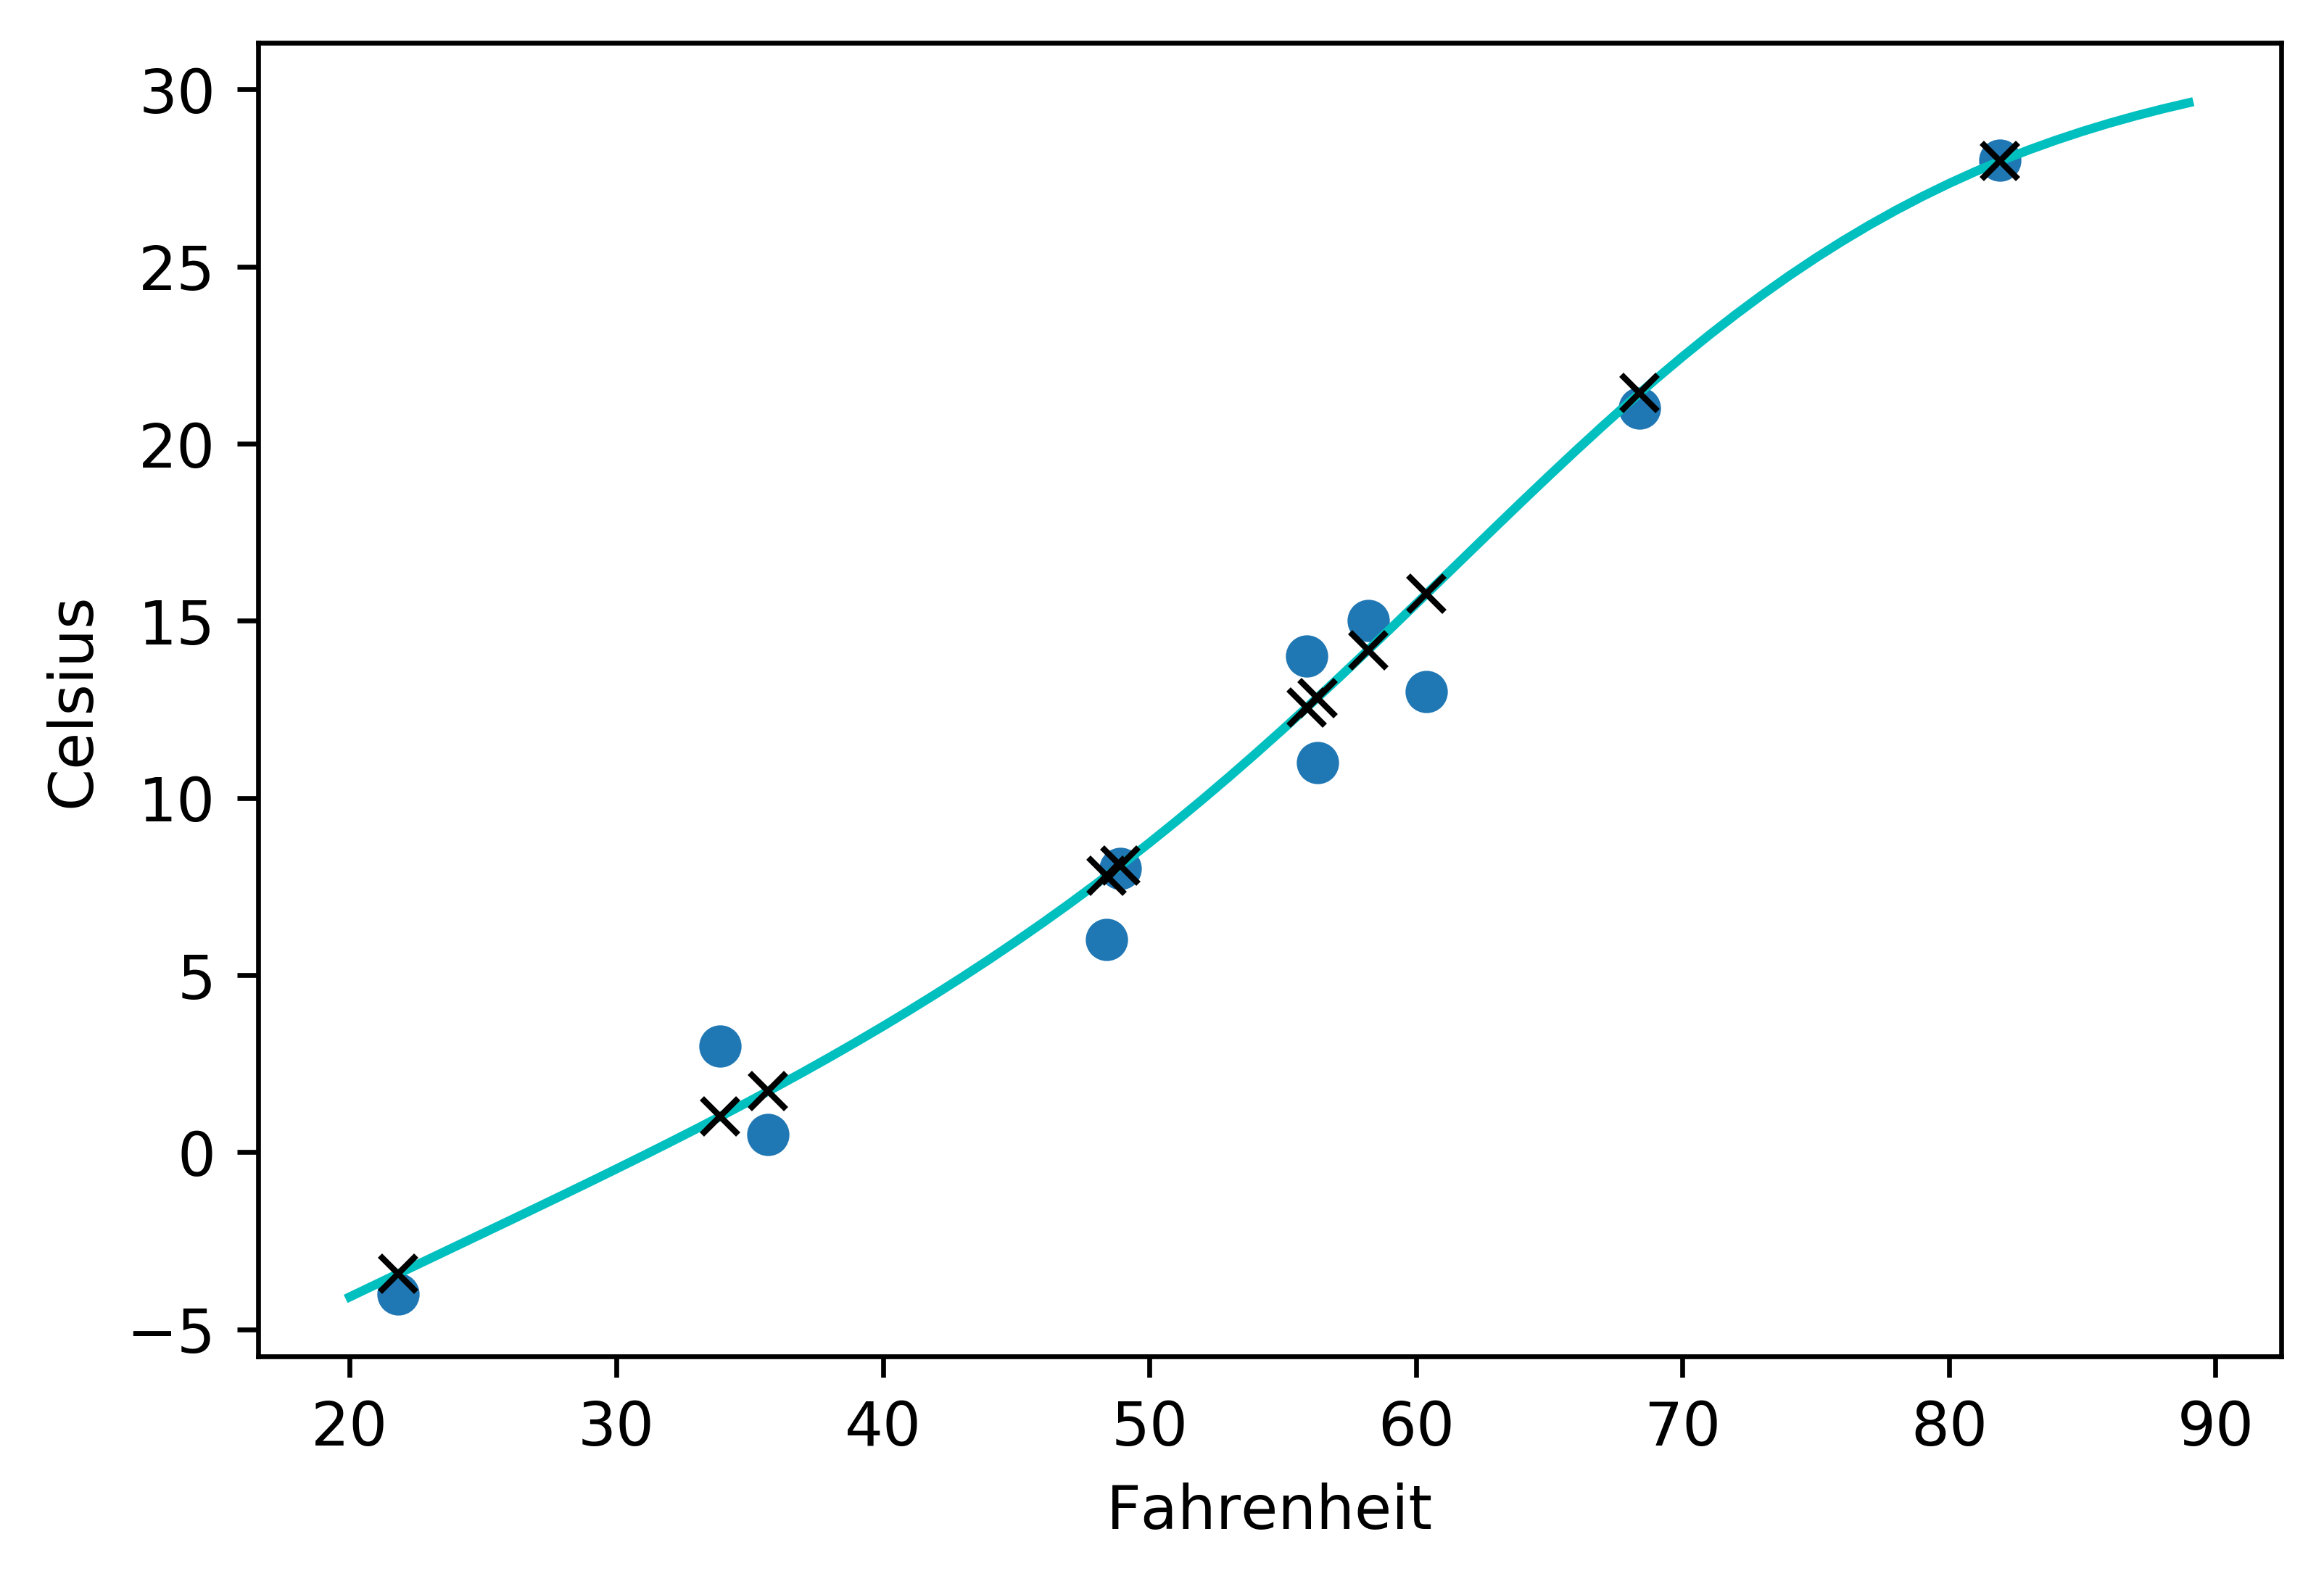

In [29]:
from matplotlib import pyplot as plt

t_range = torch.arange(20.,90.).unsqueeze(1)

fig = plt.figure(dpi=600)

plt.xlabel('Fahrenheit')
plt.ylabel('Celsius')
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')